# Análise de Dados Magalu

## Análise de Dados de Smartphones, Notebooks e Smart TVs

### Análise de Dados: Smart TVs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output/dataset_smart_tv.csv', sep=';')

In [3]:
df.head()

,descricao,preco,avaliacao,quantidade_avaliacoes,URL
0,Smart TV 50” Crystal 4K Samsung 50AU7700,3099.00,3,28,https://www.magazineluiza.com.br/smart-tv-50-c...
1,Smart TV 65” Crystal 4K Samsung 65AU7700 Wi-Fi,4199.00,3,3,https://www.magazineluiza.com.br/smart-tv-65-c...
2,Smart TV 55” Crystal 4K Samsung 55AU7700,3299.00,5,2,https://www.magazineluiza.com.br/smart-tv-55-c...
3,Smart TV 60” Crystal 4K Samsung 60AU8000 Wi-Fi,3989.05,5,3,https://www.magazineluiza.com.br/smart-tv-60-c...
4,Smart TV 32” HD LED TCL S615 VA 60Hz,1398.00,5,4,https://www.magazineluiza.com.br/smart-tv-32-h...


In [4]:
df.count()

descricao                1015
preco                     966
avaliacao                1015
quantidade_avaliacoes    1015
URL                      1015
dtype: int64

## Verificação de Valores Nulos: NaN

In [5]:
df.isnull().sum().sum()

49

In [6]:
df['preco'].isnull().sum()

49

A coluna de preços contém valores nulos. É melhor excluir esses registros do que substituir por um valor de preço = 0

In [7]:
df = df.dropna()

In [8]:
df.count()

descricao                966
preco                    966
avaliacao                966
quantidade_avaliacoes    966
URL                      966
dtype: int64

Agora os registros com preço nulo foram excluídos do dataframe

## Estatística descritiva

Seguem algumas estatísticas descritivas relativas aos smartphones:

In [9]:
df.describe()

,preco,avaliacao,quantidade_avaliacoes
count,966.000000,966.000000,966.000000
mean,4303.006108,4.832298,6.858178
std,6111.372292,0.565715,48.939971
min,11.060000,1.000000,0.000000
25%,1899.000000,5.000000,0.000000
50%,2899.000000,5.000000,0.000000
75%,4556.132500,5.000000,0.000000
max,79999.000000,5.000000,937.000000


## Histograma: Distribuição de Frequencias

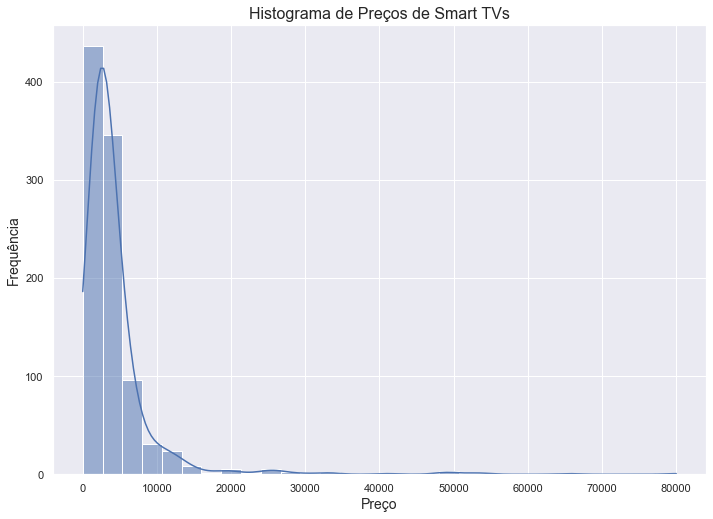

In [43]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df, x='preco', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Smart TVs", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

A distribuição é fortemente assimétrica dada a presença de outliers

## Boxplot: Visualização de outliers

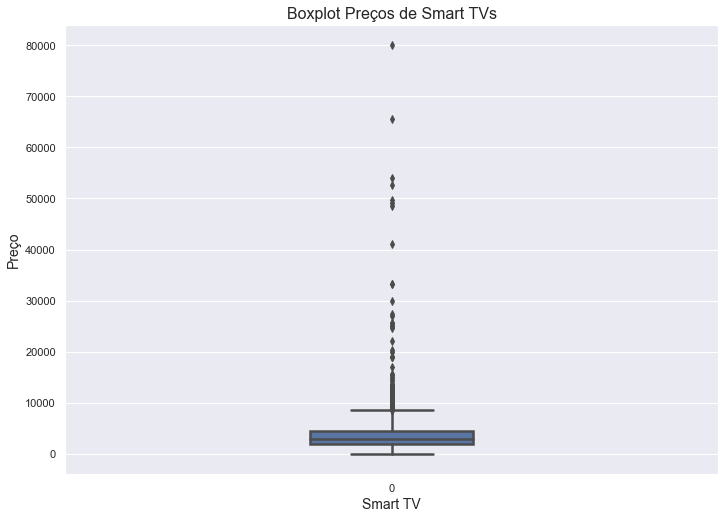

In [45]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=df['preco'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Boxplot Preços de Smart TVs", fontsize=16)
boxplot.set_xlabel("Smart TV", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

### Remoção de Outliers

Percebe-se que há outliers no departamento de smartphones.

Podem ser acessórios para smartphones com preços muito baixos, ou celulares com preços muito acima da média

Haverá agora um trabalho de remoção de outliers do nosso dataset

### Função que retira os indices dos outliers do nosso dataframe

In [12]:
def outliers_indexes(df, ft):
    """ 
    Função que retorna o índice dos outliers
    Embasamento matemático:
    Amplitude Interquartil => IQR = Quartil_3 - Quartil_1
    Limite Inferior => LI = Quartil_1 - 1.5*IQR
    Limite Superior => LS = Quartil_3 + 1.5*IQR
    Todos os dados que estiverem acima do limite superior ou abaixo do limite inferior, são outliers
    """
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    LI = Q1 - 1.5*IQR
    LS = Q3 + 1.5*IQR
    
    lista_indices = df.index[ (df[ft] < LI) | (df[ft] > LS) ]
    
    return lista_indices

In [13]:
# Cria-se uma lista vazia para armazenar os índices de saídas de múltiplas colunas 
# (somente caso se quisesse tirar outliers de multiplas colunas)
index_list = []
for feature in ['preco', 'quantidade_avaliacoes']:
    index_list.extend(outliers_indexes(df, feature))

Será usada uma versão mais simples, apenas para retornar os índices de uma única coluna, o preço

In [14]:
outliers_index_list = outliers_indexes(df, 'preco')

In [15]:
outliers_index_list

Int64Index([ 44,  71, 101, 128, 134, 141, 142, 148, 149, 153, 155, 159, 169,
            170, 172, 179, 187, 189, 192, 212, 215, 267, 270, 271, 278, 282,
            291, 292, 311, 320, 337, 338, 343, 346, 357, 381, 382, 384, 397,
            420, 422, 428, 469, 482, 489, 493, 518, 549, 559, 560, 563, 574,
            581, 583, 594, 612, 614, 615, 621, 638, 639, 649, 659, 661, 667,
            669, 680, 682, 687, 700, 701, 702, 733, 739, 741, 750, 753, 765,
            802, 809, 814, 825, 842, 853, 870],
           dtype='int64')

In [16]:
len(outliers_index_list)

85

### Função de Remoção de Outliers

Por fim, define-se uma função para a remoção de todos os registros que contém outliers, tendo a lista de índices como input

In [17]:
def remove_outliers(df, index_list):
    index_list = sorted(set(index_list))
    # Drop dos outliers
    df = df.drop(index_list)
    return df   

### Limpa-se o dataframe dos outliers

In [18]:
df_clean = remove_outliers(df, outliers_index_list)

In [33]:
df_clean.shape

(881, 5)

### Remove-se os itens com valor muito baixo

In [35]:
df_mask = df_clean['preco'] >= 1000
df_clean = df_clean[df_mask]

## Histograma: Distribuição de Frequência (Outliers removidos)

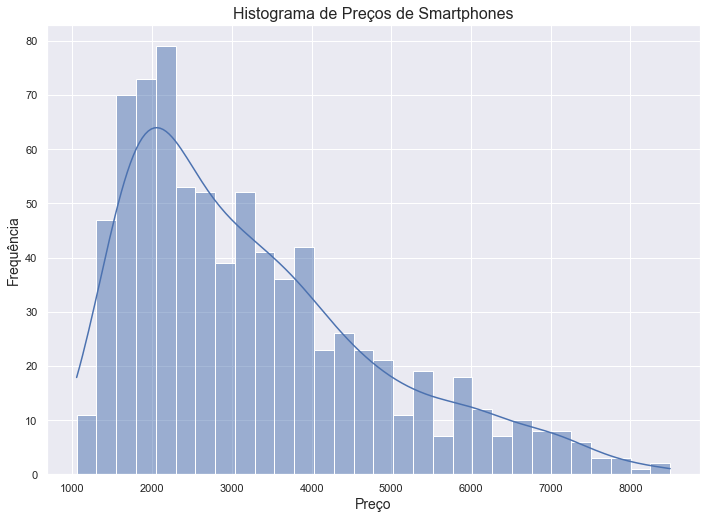

In [36]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df_clean, x='preco', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Smartphones", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

Nota-se maior simetria na distribuição após a remoção dos outliers, ainda que esta não seja uma distribuição Gaussiana

## Boxplot sem Outliers

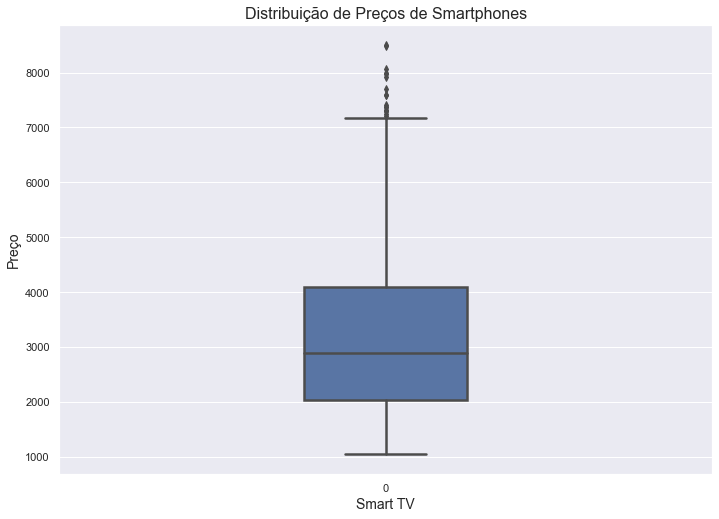

In [46]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=df_clean['preco'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Distribuição de Preços de Smartphones", fontsize=16)
boxplot.set_xlabel("Smart TV", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

## Estatística descritiva, sem outliers

In [38]:
df_clean.describe()

,preco,avaliacao,quantidade_avaliacoes
count,803.000000,803.000000,803.000000
mean,3272.577908,4.825654,8.176837
std,1563.623186,0.555624,53.578582
min,1052.100000,1.000000,0.000000
25%,2042.385000,5.000000,0.000000
50%,2897.650000,5.000000,0.000000
75%,4099.000000,5.000000,0.000000
max,8499.000000,5.000000,937.000000


Verifica-se assim que:
 - A média de preço de uma Smart TV está em torno de 3300 reais, com 1500 reais para mais ou para menos
 - A Mediana do preço de uma smart tv é 2900 reais
 - A média de quantidade de avaliações é 8 por produto. A baixa quantidade pode indicar que essa medida não é confiável

## Item Mais Caro (Outliers não removidos)

In [39]:
df_mask = df['preco']==max(df['preco'])
filtered_df = df[df_mask]
print(filtered_df)

                                             descricao    preco  avaliacao  \
142  Smart TV 85” 8K NEO QLED Mini Led Samsung 85QN...  79999.0          5   

     quantidade_avaliacoes                                                URL  
142                      0  https://www.magazineluiza.com.br/smart-tv-85-8...  


## Item Mais Caro (Outliers Removidos)

In [40]:
df_mask = df_clean['preco']==max(df_clean['preco'])
filtered_df = df_clean[df_mask]
print(filtered_df)

                                             descricao   preco  avaliacao  \
522  Smart TV 4K LG OLED 65" com Inteligência Artif...  8499.0          5   

     quantidade_avaliacoes                                                URL  
522                      0  https://www.magazineluiza.com.br/smart-tv-4k-l...  


## Item mais barato

In [41]:
df_mask = df_clean['preco'] >= 1000
filtered_df = df_clean[df_mask]
print(filtered_df.sort_values(by=['preco'], ascending=True)[:5])

                                             descricao    preco  avaliacao  \
129  Monitor Smart TV LED 24" LG 24TL520S HD 2 HDMI...  1052.10          4   
65   Smart TV LED LG 24" Monitor Wi-Fi Webos 3.5 DT...  1063.05          4   
130  Smart TV Monitor LG 24 Polegadas LED Wi-Fi web...  1079.10          4   
28   Smart TV Monitor LG 24" LED Wi-Fi webOS 3.5 DT...  1079.10          4   
45   Smart TV Multilaser 32 HD LCD Wi-Fi USB HDMI C...  1169.10          5   

     quantidade_avaliacoes                                                URL  
129                    312  https://www.magazineluiza.com.br/monitor-smart...  
65                       5  https://www.magazineluiza.com.br/smart-tv-led-...  
130                    104  https://www.magazineluiza.com.br/smart-tv-moni...  
28                     193  https://www.magazineluiza.com.br/smart-tv-moni...  
45                       0  https://www.magazineluiza.com.br/smart-tv-mult...  


Item mais barato: Monitor Smart TV LED 24" LG 24TL520S HD que custa 1052 reais

## 5 itens com preço menor ou igual a média

In [50]:
df_mask = df_clean['preco']<=df_clean['preco'].mean()
filtered_df = df_clean[df_mask]
print(filtered_df.sort_values(by=['preco'], ascending=False)[:5])

                                             descricao    preco  avaliacao  \
301  Smart TV 50" LG HD 4K LED LG 50UP7550PSF 60Hz ...  3254.07          5   
860  Smart TV LED 50" Ultra HD 4K Philco PTV50N10N5...  3239.10          5   
830  Smart TV LED 50" Ultra HD 4K Samsung LH50BEAHV...  3239.10          5   
107  Smart TV UHD 4K LED IPS 55" LG 55UN7310PSC Wi-...  3237.65          4   
243  Smart TV LED 4K UHD 55"LG 55UN7310 Conversor W...  3229.91          5   

     quantidade_avaliacoes                                                URL  
301                      0  https://www.magazineluiza.com.br/smart-tv-50-l...  
860                      0  https://www.magazineluiza.com.br/smart-tv-led-...  
830                      0  https://www.magazineluiza.com.br/smart-tv-led-...  
107                     14  https://www.magazineluiza.com.br/smart-tv-uhd-...  
243                      0  https://www.magazineluiza.com.br/smart-tv-led-...  


Estes itens são considerados mid-range e tem uma boa relação custo-benefício.